# Introduction to NumPy

Handy cheatsheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

### Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib widget

## Function to visualize arrays

In [3]:
def view_array(data,alpha=1.0,text=True):

    if len(data.shape) > 4:
        print("Sorry, can't process >4-dimensional input array")
        return None
    while len(data.shape) < 4:
        data = np.expand_dims(data,0)

    i_arr, j_arr, k_arr = np.indices(data.shape[:-1])

    shape = list(data.shape[:-1]) #can only visualize up to 3 dimensions
    if data.shape[-1] == 4:
        colors = data
    elif data.shape[-1] == 3:
        colors = np.concatenate((data,np.full(shape + [1],alpha)),axis=-1)
    else:
        if np.max(data) <= 1 and np.min(data) >=0:
            opacity = data
        elif np.ptp(data) > 0:
            opacity = (data - min(data))/np.ptp(data)
        elif np.max(data) != 0:
            opacity = 0.9*data/max(data)

        #opacity = np.clip(opacity,0,1.0)

        colors = (np.ones(shape + [3]))
        colors = np.concatenate((colors,opacity),-1)

    ### normalize colors if necessary:
    if np.max(colors[...,:3]) > 1 or np.min(colors[...,:3]) < 0:
        colors[...,:3] = colors[...,:3] - np.min(colors[...,:3])
        colors[...,:3] = colors[...,:3]/np.max(colors[...,:3])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'{shape[0]} x {shape[1]} x {shape[2]} array')
    ax.set_proj_type('ortho')
    ax.set_box_aspect((max(np.ptp(i_arr),1), max(np.ptp(j_arr),1), max(np.ptp(k_arr),1)))
    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    visible_mask = colors[...,3] > 0
    ax.voxels(visible_mask, edgecolors = 'black', facecolors = colors)

    if text:
        for i,j,k in zip(i_arr.flatten(), j_arr.flatten(), k_arr.flatten()):
            label = f'{i}{j}{k}'
            ax.text(i+0.3,j+0.3,k+0.3, label, None)

    ax.set_xlabel('i')
    ax.set_ylabel('j')
    ax.set_zlabel('k')
    ax.set_xlim(0,shape[0])
    ax.set_ylim(0,shape[1])
    ax.set_zlim(0,shape[2])


## 1) Fun with arrays

### Creation

In [4]:
### From list:
my_list = [[1,23,2],
           [56,789,10]]
my_arr = np.array(my_list)

In [5]:
my_arr

array([[  1,  23,   2],
       [ 56, 789,  10]])

In [6]:
my_arr.shape

(2, 3)

In [7]:
### Constant:
full_arr = np.full((2,3,2),926.2)
full_arr

array([[[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]],

       [[926.2, 926.2],
        [926.2, 926.2],
        [926.2, 926.2]]])

In [8]:
### Random:
rand_arr = np.random.random((2,3,2))
rand_arr

array([[[0.72454569, 0.99521793],
        [0.01044231, 0.34370617],
        [0.35476705, 0.61478482]],

       [[0.41845124, 0.31619645],
        [0.19560283, 0.77929862],
        [0.06856737, 0.79892373]]])

In [9]:
### Zeros / ones:
zeros_arr = np.zeros((3,2,4))
ones_arr = np.ones((5,3,3,1))

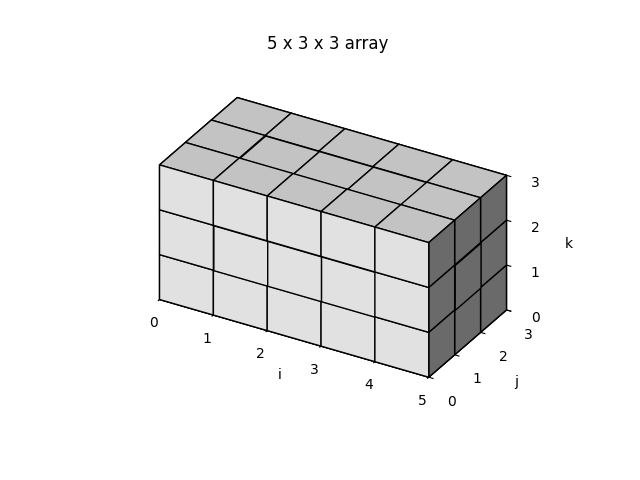

In [10]:
view_array(ones_arr)

### Properties

In [11]:
ones_arr.shape

(5, 3, 3, 1)

In [12]:
ones_arr.size

45

In [13]:
ones_arr.dtype

dtype('float64')

### Math

In [14]:
apple = ones_arr.copy()
apple = 0.6*apple

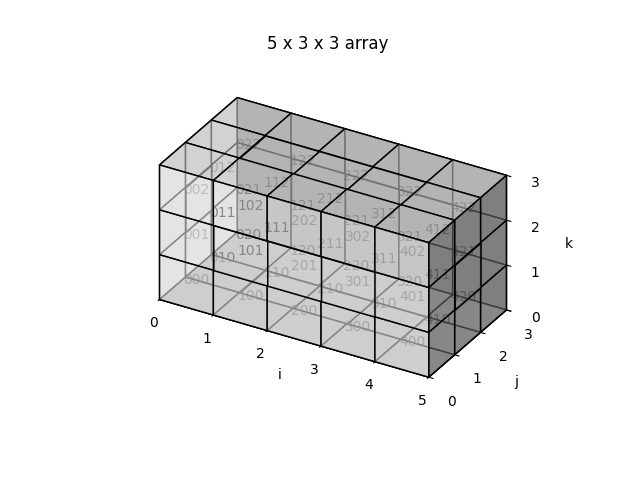

In [15]:
view_array(apple)

### Assignment
Let's try to "hide" two of the boxes

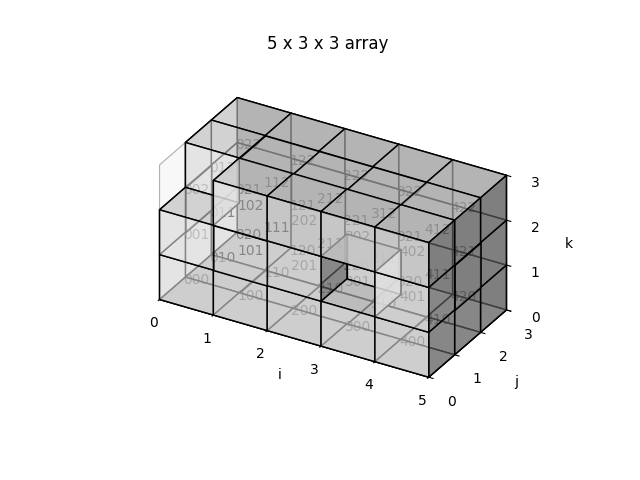

In [16]:
apple[3,0,1] = 0
apple[0,0,2] = 0
view_array(apple)

### Logic

In [17]:
greater_than_half = apple > 0.5
apple[greater_than_half]  = 0.0
apple[~greater_than_half] = 0.9

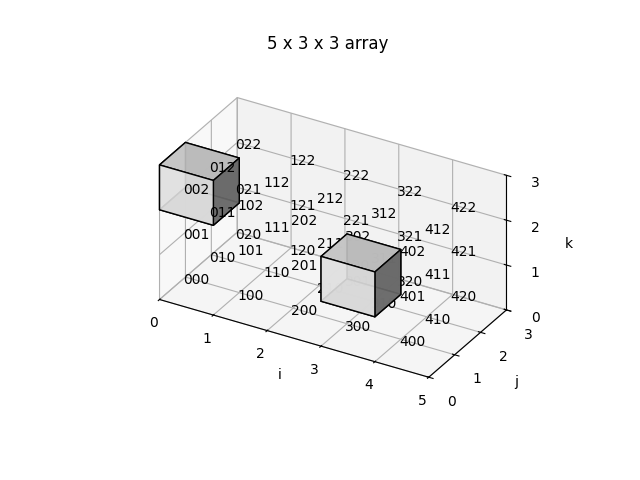

In [18]:
view_array(apple)

### Slicing (selecting)

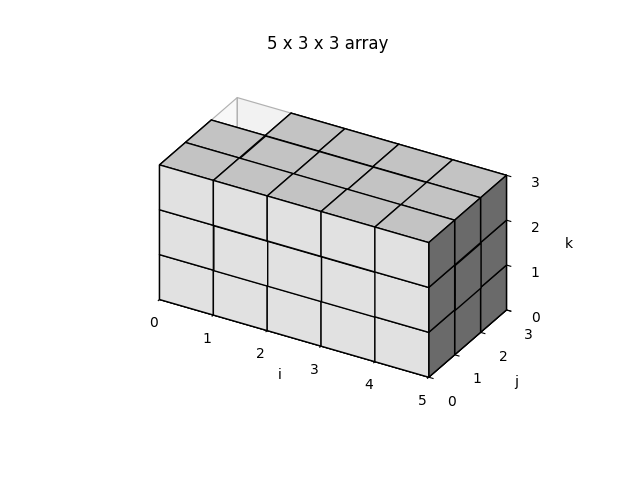

In [19]:
apple = ones_arr.copy()
apple[0,-1,:] = 0
view_array(apple)

### Reshaping

In [20]:
apple = ones_arr.copy()
print(apple.shape)

(5, 3, 3, 1)


In [21]:
apple = apple.reshape(1,15,3,1)

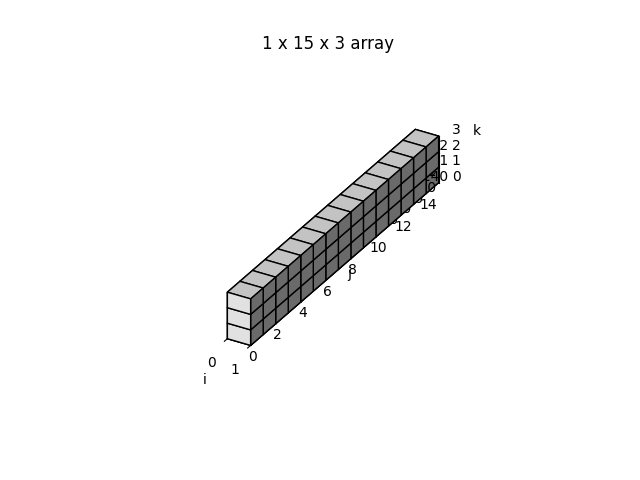

In [22]:
view_array(apple)

## 2) Making an actual apple

### It should be:
- red
- round

### First, let's make it red

In [23]:
red_RGBa = [1,0,0,0.8] # = [R, G, B, alpha]

# Construct an array by repeating "red" the number of times for each dimension given by the second argument
apple = np.tile(red_RGBa,(15,15,15,1))

In [24]:
apple.shape

(15, 15, 15, 4)

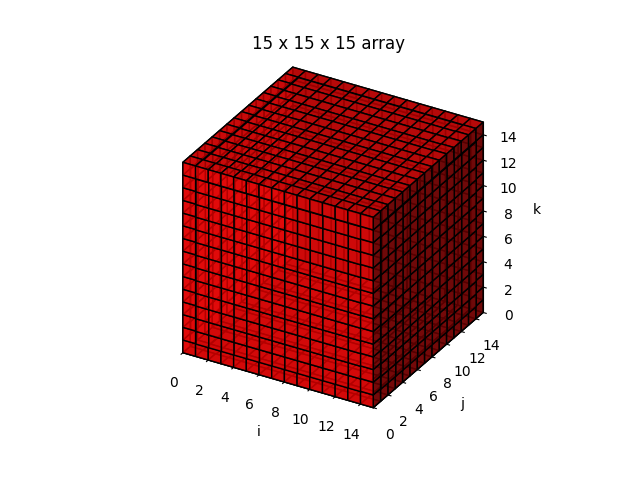

In [25]:
view_array(apple,text=False)

### Now let's make it round by removing the corners

In [26]:
# for each box we have three values: i, j, and k
# (also each box has a color, which is a 4-tuple (R, G, B, alpha), but we will exclude the -1th dimension)
i, j, k = np.indices(apple.shape[:-1])

In [27]:
# each index array has the exact same shape as "apple", but stores the corresponding i, j, or k value
print(i.shape)

(15, 15, 15)


In [28]:
# let's combine i, j, and k into a single array stored for each cell
# this creates a new axis at the end of the array
ijk = np.stack((i,j,k), axis=-1)
print(ijk.shape)

(15, 15, 15, 3)


In [29]:
### get radius from the average length of the box
diameter = np.mean(apple.shape[:-1])
radius = diameter/2
print(radius)

7.5


In [30]:
### mean 3-position over all axes (except the last one)
center_of_mass = np.mean(ijk, axis=(0,1,2))
print(center_of_mass)

[7. 7. 7.]


In [31]:
### compute the distance of each box to the center of mass
distance = (ijk - center_of_mass)**2
distance = distance.sum(axis=-1)
distance = np.sqrt(distance)
print(distance.shape)

(15, 15, 15)


In [32]:
# now make the corners transparent
corner_mask = distance > 1.1*radius
apple[corner_mask] = [1,0,0,0]

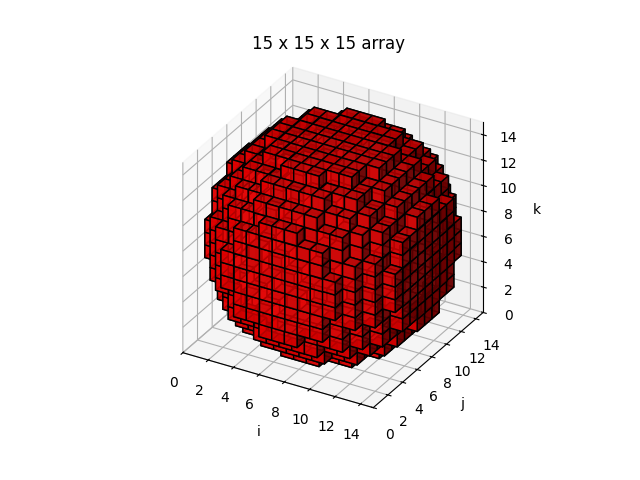

In [33]:
view_array(apple,text=False)

### Can we slice the apple?

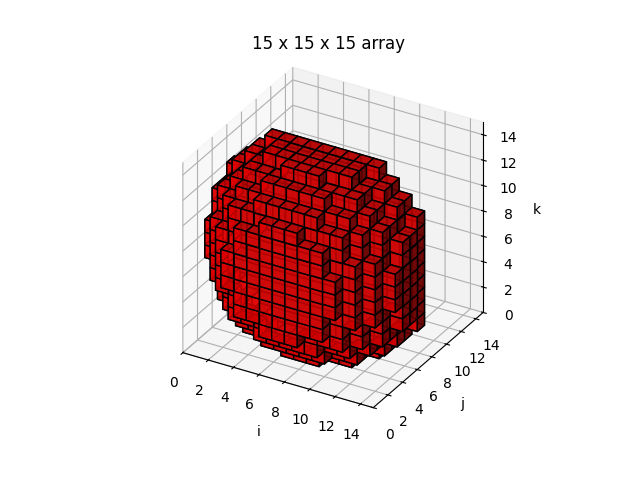

In [34]:
# Make the second half of the j dimension transparent
half_apple = apple.copy()
half_apple[:,int(radius):,:] = [1,0,0,0]
view_array(half_apple, text=False)

## 3) Combining apple and orange

In [35]:
orange_RGBa = [247/256, 162/256, 17/256, 0.8]
orange = apple.copy()
where_red = (apple[...,-1] != 0) # note that "..." is numpy shorthand for "all dimensions before this"
orange[where_red] = orange_RGBa

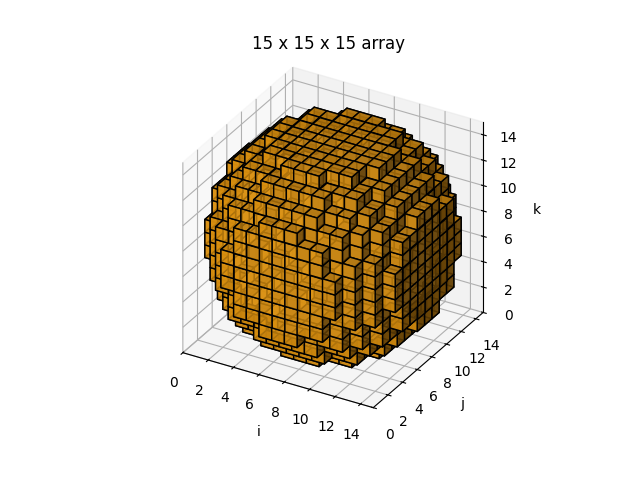

In [36]:
view_array(orange,text=False)

### Concatenate

In [37]:
# this is identical to np.vstack((apple,orange))
fruits = np.concatenate((apple,orange), axis=0)

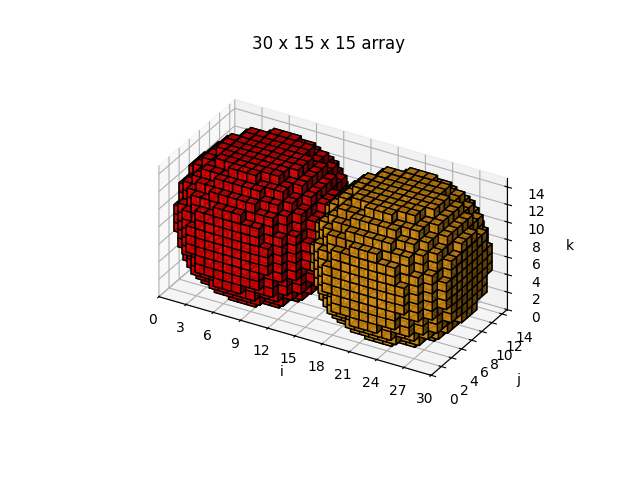

In [38]:
view_array(fruits,text=False)

In [39]:
# this is identical to np.hstack((apple,orange))
fruits = np.concatenate((apple,orange),axis=1)

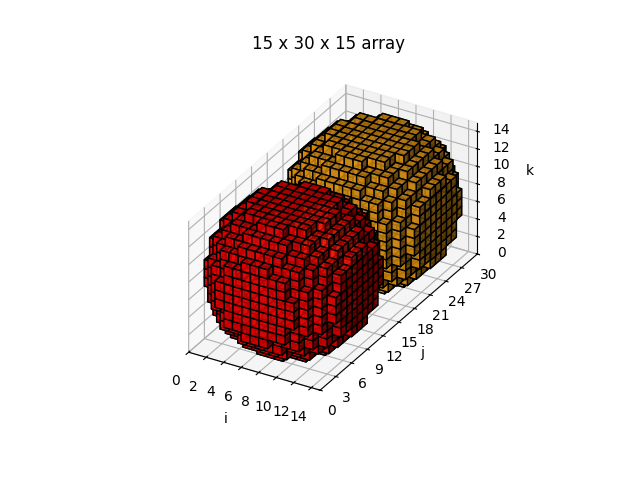

In [40]:
view_array(fruits,text=False)

### Split in half

In [41]:
halves = np.split(fruits, 2, axis=1)
print(len(halves))
print(halves[0].shape) ### <-- this is the same as apple.shape
print(halves[1].shape) ### <-- this is the same as orange.shape

2
(15, 15, 15, 4)
(15, 15, 15, 4)


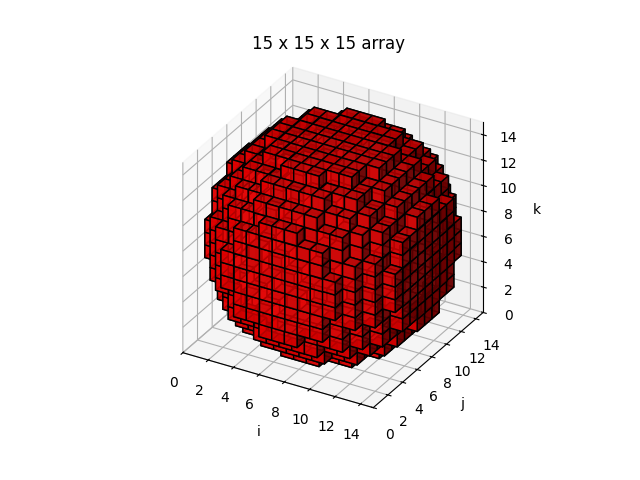

In [42]:
view_array(halves[0],text=False)

### Make apple-orange split

In [43]:
thirds = np.split(fruits, 3, axis=1)
apple_orange = np.concatenate((thirds[0], thirds[2]),axis=1)
print(apple_orange.shape)

(15, 20, 15, 4)


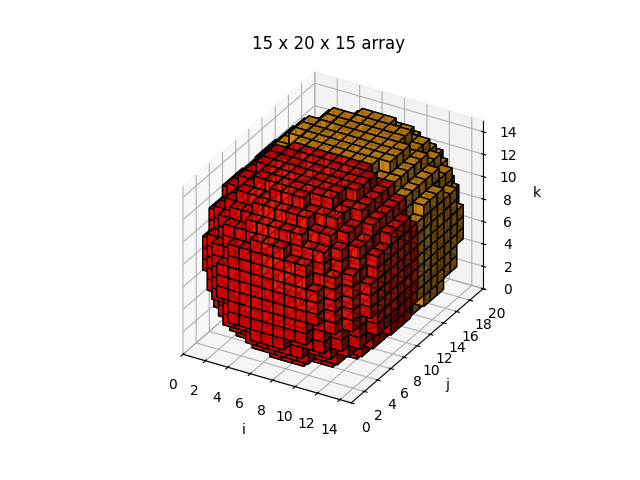

In [44]:
view_array(apple_orange,text=False)

### Matrix-multiply

In [45]:
# This is a rotation matrix which will operate on the RGB values
def get_z_rotation_matrix(theta):
    mat = [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta),  np.cos(theta), 0],
            [0,          0,                 1],
        ]
    return np.array(mat)

In [46]:
print(red_RGBa)
print(orange_RGBa)

[1, 0, 0, 0.8]
[0.96484375, 0.6328125, 0.06640625, 0.8]


In [47]:
z_rotation_matrix = get_z_rotation_matrix(np.pi/2)

In [48]:
print(z_rotation_matrix)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


In [49]:
# we only want to operate on the (R,G,B) values, not the alpha, 
# so we first slice the array to separate them out:
colors_only = apple_orange[...,  :-1]
alphas_only = apple_orange[..., 3:  ]

In [50]:
# now multiply with the rotation matrix
new_colors = np.matmul(colors_only,z_rotation_matrix)

In [51]:
# rejoin the new colors and the alphas
apple_orange = np.concatenate((new_colors,alphas_only),axis=-1)

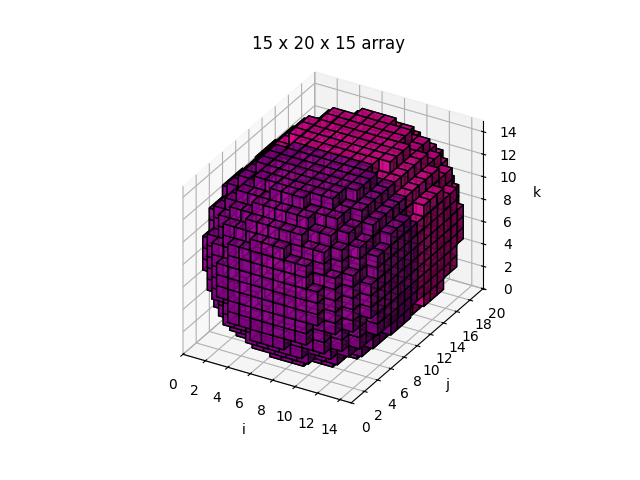

In [52]:
view_array(apple_orange,text=False)

## 4) Bonus: Pseudo-Rubix cube

In [53]:
rubix_cube = np.random.random((3,3,3,3))

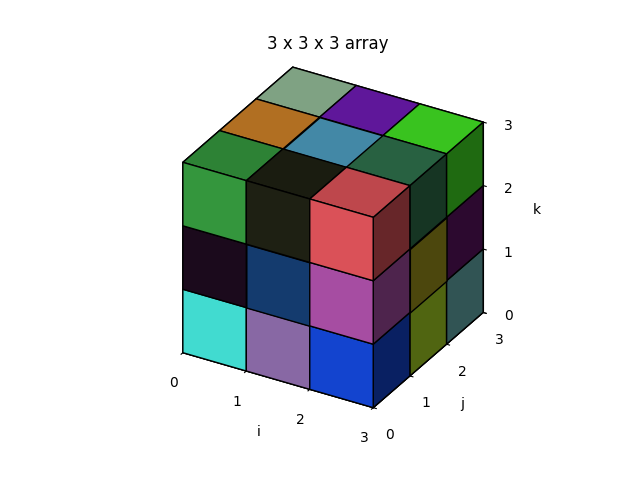

In [54]:
view_array(rubix_cube,text=False)